In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the Dataset
mnist=pd.read_csv(r"D:\python files\MNIST_Train.csv")

In [3]:
mnist.shape

(42000, 785)

In [4]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [8]:
mnist.isna().sum()[mnist.isna().sum()>0]


Series([], dtype: int64)

In [9]:
#Column names in the Dataset
mnist.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [10]:
#Columns information
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
# to build the nn model which can identify the hand written digits 
# but we used a cnn algorithm 

In [12]:
from sklearn.model_selection import train_test_split #here we import train_test_split for sampling

In [13]:
mnist_train,mnist_test=train_test_split(mnist,test_size=.2)

In [14]:
mnist_train_x=mnist_train.iloc[:,1::]#split into x(indipendant) and y(dependant) 
mnist_train_y=mnist_train.iloc[:,0]

In [15]:
mnist_test_x=mnist_test.iloc[:,1::]
mnist_test_y=mnist_test.iloc[:,0]

In [16]:
# we convert the data into the array
mnist_train_x=np.array(mnist_train_x)
mnist_test_x=np.array(mnist_test_x)

In [17]:
# normalize is will make your data unitless
mnist_train_x = tf.keras.utils.normalize(mnist_train_x)
mnist_test_x = tf.keras.utils.normalize(mnist_test_x)

In [18]:
type(mnist_train_x)

numpy.ndarray

In [19]:
mnist_test_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# here we reshape our every every image in 28*28*1 format because there is chances
# the image are in the other shapes also 

mnist_train_x = mnist_train_x.reshape(-1,28,28,1)
mnist_train_x.shape

(33600, 28, 28, 1)

In [21]:
from keras.models import Sequential 
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout 

from tensorflow.keras.utils import to_categorical

In [22]:
model = Sequential()#intialing
model.add(Conv2D(filters =16 , kernel_size =(5,5) , activation='relu', padding='same'))
model.add(MaxPool2D (pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dense(10 , activation='softmax'))
# sequential means the exexicution of the model 
# we used 16 type of filters(slider) at here
# we exicute the steps same like neural network execution

In [23]:
model.compile(optimizer= 'adam',loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [24]:
model1= model.fit(mnist_train_x ,mnist_train_y , epochs=10 ,validation_split=.2,batch_size =100)

Epoch 1/10
269/269 [==============================] - 4s 14ms/step - loss: 0.6081 - accuracy: 0.8517 - val_loss: 0.2574 - val_accuracy: 0.9211
Epoch 2/10
269/269 [==============================] - 4s 14ms/step - loss: 0.2081 - accuracy: 0.9381 - val_loss: 0.1830 - val_accuracy: 0.9448
Epoch 3/10
269/269 [==============================] - 4s 14ms/step - loss: 0.1416 - accuracy: 0.9580 - val_loss: 0.1217 - val_accuracy: 0.9655
Epoch 4/10
269/269 [==============================] - 4s 14ms/step - loss: 0.1027 - accuracy: 0.9693 - val_loss: 0.0996 - val_accuracy: 0.9731
Epoch 5/10
269/269 [==============================] - 4s 13ms/step - loss: 0.0793 - accuracy: 0.9764 - val_loss: 0.0926 - val_accuracy: 0.9740
Epoch 6/10
269/269 [==============================] - 4s 13ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0842 - val_accuracy: 0.9771
Epoch 7/10
269/269 [==============================] - 4s 13ms/step - loss: 0.0524 - accuracy: 0.9849 - val_loss: 0.0816 - val_accuracy: 0.9763

In [25]:
mnist_test_x=np.array(mnist_test_x)
mnist_test_x=mnist_test_x.reshape(-1,28,28,1)

In [28]:
pred_values=model.predict(mnist_test_x)

263/263 [==============================] - 0s 2ms/step


In [29]:
pred_values.shape

(8400, 10)

In [30]:
pred_classes = np.argmax(pred_values , axis =1 )

In [31]:
from sklearn import metrics 
from sklearn.metrics import f1_score

In [32]:


from sklearn import metrics 
from sklearn.metrics import f1_score

classification_report = metrics.classification_report(mnist_test_y ,pred_classes )

print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       803
           1       0.99      0.99      0.99       924
           2       0.98      0.98      0.98       842
           3       0.98      0.98      0.98       838
           4       0.99      0.98      0.98       824
           5       0.98      0.98      0.98       772
           6       0.99      0.98      0.98       873
           7       0.99      0.98      0.98       890
           8       0.98      0.96      0.97       835
           9       0.96      0.99      0.97       799

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [40]:
from sklearn.metrics import confusion_matrix
tab=confusion_matrix(mnist_test_y ,pred_classes )
tab

array([[792,   1,   1,   0,   1,   2,   2,   0,   2,   2],
       [  0, 916,   2,   1,   1,   0,   1,   2,   1,   0],
       [  1,   3, 829,   3,   0,   0,   0,   4,   0,   2],
       [  0,   0,   2, 821,   0,   5,   1,   2,   4,   3],
       [  1,   1,   1,   0, 811,   0,   1,   1,   0,   8],
       [  2,   0,   1,   3,   0, 756,   2,   1,   6,   1],
       [  9,   0,   0,   0,   2,   3, 854,   0,   5,   0],
       [  1,   1,   5,   3,   0,   0,   0, 874,   0,   6],
       [  5,   7,   6,   2,   3,   2,   2,   2, 798,   8],
       [  1,   0,   0,   3,   5,   0,   0,   1,   1, 788]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(mnist_test_y ,pred_classes )

0.9808333333333333

In [35]:
df1 = pd.DataFrame(model1.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,0.608143,0.851674,0.257443,0.921131
1,0.208060,0.938132,0.183019,0.944792
2,0.141588,0.957999,0.121717,0.965476
3,0.102685,0.969308,0.099644,0.973065
4,0.079279,0.976376,0.092600,0.973958
5,0.064516,0.980283,0.084233,0.977083
6,0.052371,0.984933,0.081568,0.976339
7,0.043902,0.987016,0.070706,0.978720
8,0.037579,0.989509,0.073005,0.978423
9,0.031518,0.991220,0.070022,0.978274


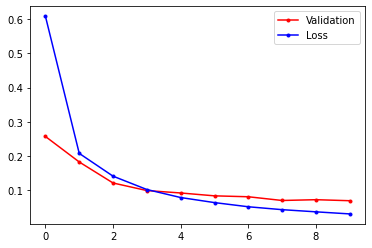

In [36]:
plt.plot(df1.val_loss, color = 'r', marker = '.', label = "Validation")
plt.plot(df1.loss,color = 'b', marker = '.',label = "Loss")
plt.legend()

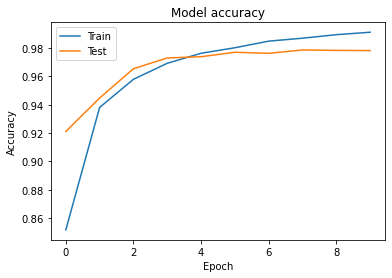

In [37]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

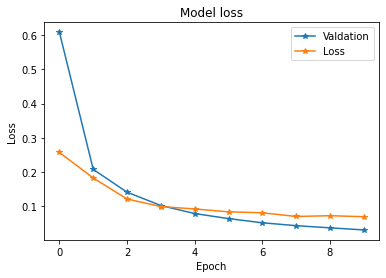

In [38]:
plt.plot(model1.history['loss'],marker='*')
plt.plot(model1.history['val_loss'],marker='*') 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Valdation', 'Loss'], loc='upper right') 
plt.show()